In [2]:
import glob
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [3]:
model_dense = np.load("./model_dense.npy")
model_dense.shape

(3, 256, 116)

In [25]:
model_dense_1 = np.load("./model_dense_1.npy")
model_dense_1.shape

(3, 245, 82)

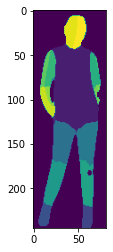

In [68]:
plt.imshow(model_dense_1[0])

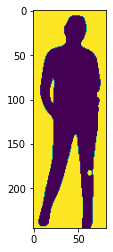

In [89]:
plt.imshow(model_dense_1[0] == 0)

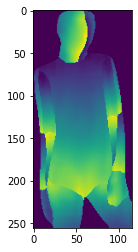

In [6]:
plt.imshow(model_dense[1])

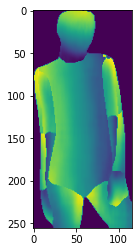

In [7]:
plt.imshow(model_dense[2])

In [8]:
model_image = Image.open("./model.jpg")
model_array = np.asarray(model_image)[:model_dense.shape[1],:model_dense.shape[2],:]
model_array.shape

(256, 116, 3)

In [38]:
model_image_1 = Image.open("./model_1.jpg")
model_array_1 = np.asarray(model_image_1)[:model_dense_1.shape[1], :model_dense_1.shape[2],:]
model_array_1.shape

(245, 82, 3)

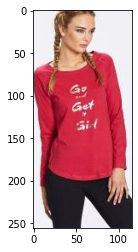

In [9]:
plt.imshow(model_array)

In [10]:
solution = 75
solution_float = float(solution) - 1

In [11]:
U = model_dense[1, :, :]
V = model_dense[2, :, :]
parts = list()
for PartInd in range(1, 25):
    actual_part = np.zeros((solution, solution, 3))
    x, y = np.where(model_dense[0,:,:] == PartInd)
    if len(x) == 0:
        parts.append(actual_part)
        continue
    u_current_points = U[x, y]
    v_current_points = V[x, y]


    tex_map_coords = ((255-v_current_points)*solution_float/255.).astype(int), (u_current_points*solution_float/255.).astype(int)
    for c in range(3):
        actual_part[tex_map_coords[0], tex_map_coords[1], c] = model_array[x, y, c]

    parts.append(actual_part)
TextureIm  = np.zeros([solution*6,solution*4,3]);
for i in range(4):
    for j in range(6):
        TextureIm[ (solution*j):(solution*j+solution)  , (solution*i):(solution*i+solution) ,: ] = parts[i*6+j]
TextureIm = TextureIm.transpose(1, 0, 2)

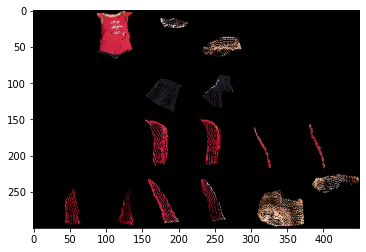

In [12]:
plt.imshow(np.uint8(TextureIm))

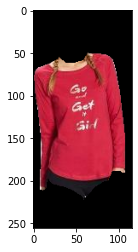

In [13]:
model_image_identity = model_array * np.expand_dims((model_dense[0] == 2)+(model_dense[0] == 15)+(model_dense[0] == 16)+(model_dense[0] == 17)+(model_dense[0] == 18)+(model_dense[0] == 19)+(model_dense[0] == 20)+ (model_dense[0] == 21)+(model_dense[0] == 22), 2)
plt.imshow(model_image_identity)

In [14]:
np.array(parts).shape

(24, 75, 75, 3)

In [15]:
IUV = model_dense

In [16]:
U = model_dense[1,:,:]
V = model_dense[2,:,:]

R_im = np.zeros(U.shape)
G_im = np.zeros(U.shape)
B_im = np.zeros(U.shape)

for PartInd in range(1, 25):
    tex = np.array(parts)[PartInd - 1, :, :, :].squeeze()
    R = tex[:,:,0]
    G = tex[:,:,1]
    B = tex[:,:,2]
    ###############
    x,y = np.where(IUV[0,:,:]==PartInd)
    u_current_points = U[x,y]   #  Pixels that belong to this specific part.
    v_current_points = V[x,y]
    ##
    r_current_points = R[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    g_current_points = G[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    b_current_points = B[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    ##  Get the RGB values from the texture images.
    R_im[IUV[0,:,:]==PartInd] = r_current_points
    G_im[IUV[0,:,:]==PartInd] = g_current_points
    B_im[IUV[0,:,:]==PartInd] = b_current_points
generated_image = np.concatenate((R_im[:,:,np.newaxis],G_im[:,:,np.newaxis],B_im[:,:,np.newaxis]), axis =2 ).astype(np.uint8)


In [17]:
generated_image.shape

(256, 116, 3)

In [21]:
plt.figure(figsize = (400,200))

<Figure size 28800x14400 with 0 Axes>

<Figure size 28800x14400 with 0 Axes>

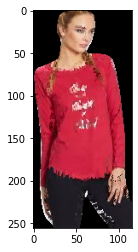

In [22]:
plt.imshow(np.uint8(generated_image) * 255)

In [23]:
generated_image.shape

(256, 116, 3)

In [32]:
np.set_printoptions(threshold=np.inf)

In [34]:
print(parts[1])

[[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.

In [28]:
IUV.shape

(3, 245, 82)

In [26]:
IUV = model_dense_1                 

In [36]:
U = model_dense_1[1,:,:]
V = model_dense_1[2,:,:]

R_im = np.zeros(U.shape)
G_im = np.zeros(U.shape)
B_im = np.zeros(U.shape)

for PartInd in range(1, 25):
    tex = np.array(parts)[PartInd - 1, :, :, :].squeeze()
    R = tex[:,:,0]
    G = tex[:,:,1]
    B = tex[:,:,2]
    ###############
    x,y = np.where(IUV[0,:,:]==PartInd)
    u_current_points = U[x,y]   #  Pixels that belong to this specific part.
    v_current_points = V[x,y]
    ##
    r_current_points = R[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    g_current_points = G[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    b_current_points = B[((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)]*255
    ##  Get the RGB values from the texture images.
    R_im[IUV[0,:,:]==PartInd] = r_current_points
    G_im[IUV[0,:,:]==PartInd] = g_current_points
    B_im[IUV[0,:,:]==PartInd] = b_current_points
generated_image = np.concatenate((R_im[:,:,np.newaxis],G_im[:,:,np.newaxis],B_im[:,:,np.newaxis]), axis =2 ).astype(np.uint8)


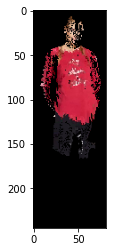

In [37]:
plt.imshow(np.uint8(generated_image) * 255)

In [53]:
apparel_matrix = np.expand_dims((model_dense_1[0] == 2)+(model_dense_1[0] == 15)+(model_dense_1[0] == 16)+(model_dense_1[0] == 17)+(model_dense_1[0] == 18)+(model_dense_1[0] == 19)+(model_dense_1[0] == 20)+ (model_dense_1[0] == 21)+(model_dense_1[0] == 22), 2)

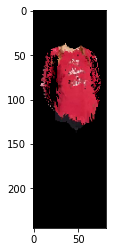

In [57]:
apparel = generated_image * apparel_matrix * 255
plt.imshow(apparel)

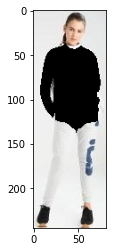

In [54]:
model_image_identity_1 = model_array_1 * np.logical_not(apparel_matrix)
plt.imshow(model_image_identity_1)

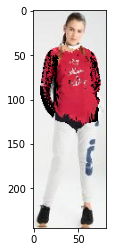

In [61]:
plt.imshow(model_image_identity_1 + apparel)

In [60]:
model_image_identity_1.shape

(245, 82, 3)